## 英雄，物品，伤害公式 

In [2]:
# bat 基础攻击间隔 。 bias基础攻速 
heroinfo = {
    "sniper":{'mainproperty':'agility', 'bat':1.7, 'bias':100, 'mindamage':19, 'maxdamge':25, 'strength':19, 'strengthadd':1.7, 'agility':21, 'agilityadd':3.4 ,'intelligence':15 ,'intelligenceadd':2.6},
    "shadowfiend":{'mainproperty':'agility', 'bat':1.7, 'bias':100, 'mindamage':15, 'maxdamge':21, 'strength':19, 'strengthadd':2.7, 'agility':20, 'agilityadd':3.5 ,'intelligence':18 ,'intelligenceadd':2.2}
}

# 旧物品列表
# iteminfo = {
#     'moonShard':{'as':140},
#     'dragonLance':{'strength':12, 'agility':12},
#     'maskMadness':{'as':120, 'ad':15},
#     'yasha':{'agility':16, 'as':12},
#     'desolator_old':{'ad':50, 'armorReduce':7},
#     'desolator':{'ad':60, 'armorReduce':6},
#     'maelstrom':{'ad':24, 'chainLightning':1},
#     'crystalys':{'ad':45, 'criticalStrike':1}
# }

# Crit 平均暴击倍率， mad 每次攻击魔法伤害
class item(object):
    def __init__(self, gold, ias=0, ad=0, strength=0, agility=0, ability=None, armorReduce=0, crit=1, mad=0):
        self.gold = gold
        self.ias = ias
        self.ad = ad
        self.strength = strength
        self.agility = agility
        self.armorReduce = armorReduce
        self.crit = crit
        self.mad = mad

# 新 物品类别
moonShard = item(ias = 140, gold = 4000)
dragonLance = item(strength = 12, agility = 12, gold = 1700)
maskMadness = item(ad = 15, ias = 120, gold = 1775)
yasha = item(agility = 16, ias = 12, gold = 2150)
desolator_old = item(ad = 50, armorReduce = 7, gold = 3500)
desolator = item(ad = 60, armorReduce = 6, gold = 3500)
crystalys_old = item(ad = 45, crit = 1.12, gold = 2130)
crystalys = item(ad = 34, crit = 1.18, gold = 2130)
daedalus = item(ad = 88, crit = 1.375, gold = 5330)
maelstrom = item(ad = 24, mad = 35, gold = 2700)
mjollnir = item(ad = 24, ias = 65, mad = 42.5, gold = 5600)
mkb = item(ad = 52, ias = 10, mad = 75, gold = 4175)
butterfly = item(ad = 25, agility = 30, ias = 30, gold = 5475)

itemList = [mjollnir, butterfly, daedalus, mkb, moonShard, desolator, maelstrom, yasha, crystalys, dragonLance]

In [3]:
# ats 每秒攻击次数 。enemyarmor ea 护甲 Magic resistance mr 魔抗。attackrate 伤害倍数  ma 魔法伤害。 mad 魔法每次伤害。。
# ismelee 被攻击方是否为近战英雄
def herodps(herodic, level, item, ea, mr, ismelee):
    ias = herodic['agility'] + herodic['bias'] + (level - 1) * herodic['agilityadd'] + item.ias
    ats = ias * 0.01 / herodic['bat']
    damageavg = (herodic['mindamage'] + herodic['maxdamge'])/2 + herodic[herodic['mainproperty']] + (level - 1) * herodic[herodic['mainproperty']+'add'] + item.ad + item.agility
    ea = ea - item.armorReduce
    ar = 1 - ((0.052 * ea) / (0.9 + 0.048 * ea))
    print(1/ats, damageavg, ar)
    return ats * damageavg * ar * item.crit + (100-mr)/100* ats * item.mad - ismelee * 8

# 10 级火枪手 佩戴银月 攻击10点甲, 25魔抗 英雄。
herodps(heroinfo['sniper'], 11, moonShard, 10, 25, 1)

    

0.576271186440678 77.0 0.6231884057971013


75.26896845694799

### 等级 装备 对 伤害的影响。

In [4]:
# 等级 装备 对 伤害的影响。
import pandas as pd
df = pd.DataFrame(columns=[i+1 for i in range(25)])

df.loc['moonShard'] = [herodps(heroinfo['sniper'], i, moonShard, 10, 25, 1) for i in range(25)]
df.loc['desolator_old'] = [herodps(heroinfo['sniper'], i, desolator_old, 10, 25, 1) for i in range(25)]
df.loc['desolator'] = [herodps(heroinfo['sniper'], i, desolator, 10, 25, 1) for i in range(25)]
df.loc['crystalys'] = [herodps(heroinfo['sniper'], i, crystalys, 10, 25, 1) for i in range(25)]
df.loc['daedalus'] = [herodps(heroinfo['sniper'], i, daedalus, 10, 25, 1) for i in range(25)]
df.loc['maelstrom'] = [herodps(heroinfo['sniper'], i, maelstrom, 10, 25, 1) for i in range(25)]
df.loc['mjollnir'] = [herodps(heroinfo['sniper'], i, mjollnir, 10, 25, 1) for i in range(25)]
df.loc['mkb'] = [herodps(heroinfo['sniper'], i, mkb, 10, 25, 1) for i in range(25)]
# df.loc['moonShard'] = [herodps(heroinfo['sniper'], i, moonShard, 10, 25) for i in range(25)]
df

0.6599378881987578 39.6 0.6231884057971013
0.6513409961685824 43.0 0.6231884057971013
0.6429652042360061 46.4 0.6231884057971013
0.6348020911127705 49.8 0.6231884057971013
0.6268436578171092 53.2 0.6231884057971013
0.6190823015294973 56.6 0.6231884057971013
0.6115107913669064 60.0 0.6231884057971013
0.6041222459132908 63.4 0.6231884057971013
0.5969101123595505 66.8 0.6231884057971013
0.5898681471200555 70.2 0.6231884057971013
0.5829903978052126 73.6 0.6231884057971013
0.576271186440678 77.0 0.6231884057971013
0.5697050938337801 80.4 0.6231884057971013
0.5632869449966865 83.8 0.6231884057971013
0.5570117955439056 87.19999999999999 0.6231884057971013
0.5508749189889824 90.6 0.6231884057971013
0.5448717948717948 94.0 0.6231884057971013
0.538998097653773 97.4 0.6231884057971013
0.5332496863237138 100.8 0.6231884057971013
0.5276225946617008 104.19999999999999 0.6231884057971013
0.522113022113022 107.6 0.6231884057971013
0.5167173252279635 111.0 0.6231884057971013
0.5114320096269555 114.3999

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
moonShard,29.394824,33.141432,36.972795,40.888910,44.889780,48.975403,53.145780,57.400910,61.740795,66.165432,...,94.493084,99.510997,104.613664,109.801084,115.073258,120.430186,125.871867,131.398302,137.009490,142.705432
desolator_old,44.720422,48.303043,52.001341,55.815318,59.744974,63.790307,67.951318,72.228008,76.620376,81.128422,...,110.605939,115.923732,121.357204,126.906353,132.571181,138.351686,144.247870,150.259732,156.387272,162.630491
desolator,47.776000,51.347619,55.029333,58.821143,62.723048,66.735048,70.857143,75.089333,79.431619,83.884000,...,112.910286,118.133333,123.466476,128.909714,134.463048,140.126476,145.900000,151.783619,157.777333,163.881143
crystalys,29.440151,32.302181,35.264220,38.326269,41.488327,44.750394,48.112471,51.574556,55.136651,58.798756,...,82.871577,87.233746,91.695925,96.258112,100.920309,105.682516,110.544731,115.506956,120.569191,125.731434
daedalus,67.636450,71.896878,76.273841,80.767341,85.377378,90.103950,94.947059,99.906704,104.982885,110.175602,...,143.779168,149.787639,155.912646,162.154189,168.512269,174.986885,181.578037,188.285725,195.109950,202.050711
maelstrom,37.576767,40.402579,43.313144,46.308463,49.388535,52.553361,55.802941,59.137275,62.556361,66.060202,...,88.863072,92.960188,97.142057,101.408680,105.760057,110.196188,114.717072,119.322709,124.013101,128.788246
mjollnir,68.809919,72.558376,76.391586,80.309550,84.312267,88.399738,92.571963,96.828941,101.170673,105.597159,...,133.935898,138.955659,144.060173,149.249441,154.523463,159.882238,165.325767,170.854050,176.467086,182.164876
mkb,77.067211,80.966645,84.950834,89.019776,93.173471,97.411921,101.735124,106.143080,110.635790,115.213254,...,144.457863,149.628602,154.884095,160.224341,165.649341,171.159095,176.753602,182.432863,188.196877,194.045645


In [7]:
df

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
moonShard,29.394824,33.141432,36.972795,40.888910,44.889780,48.975403,53.145780,57.400910,61.740795,66.165432,...,94.493084,99.510997,104.613664,109.801084,115.073258,120.430186,125.871867,131.398302,137.009490,142.705432
desolator_old,44.720422,48.303043,52.001341,55.815318,59.744974,63.790307,67.951318,72.228008,76.620376,81.128422,...,110.605939,115.923732,121.357204,126.906353,132.571181,138.351686,144.247870,150.259732,156.387272,162.630491
desolator,47.776000,51.347619,55.029333,58.821143,62.723048,66.735048,70.857143,75.089333,79.431619,83.884000,...,112.910286,118.133333,123.466476,128.909714,134.463048,140.126476,145.900000,151.783619,157.777333,163.881143
crystalys,29.440151,32.302181,35.264220,38.326269,41.488327,44.750394,48.112471,51.574556,55.136651,58.798756,...,82.871577,87.233746,91.695925,96.258112,100.920309,105.682516,110.544731,115.506956,120.569191,125.731434
daedalus,67.636450,71.896878,76.273841,80.767341,85.377378,90.103950,94.947059,99.906704,104.982885,110.175602,...,143.779168,149.787639,155.912646,162.154189,168.512269,174.986885,181.578037,188.285725,195.109950,202.050711
maelstrom,37.576767,40.402579,43.313144,46.308463,49.388535,52.553361,55.802941,59.137275,62.556361,66.060202,...,88.863072,92.960188,97.142057,101.408680,105.760057,110.196188,114.717072,119.322709,124.013101,128.788246
mjollnir,68.809919,72.558376,76.391586,80.309550,84.312267,88.399738,92.571963,96.828941,101.170673,105.597159,...,133.935898,138.955659,144.060173,149.249441,154.523463,159.882238,165.325767,170.854050,176.467086,182.164876
mkb,77.067211,80.966645,84.950834,89.019776,93.173471,97.411921,101.735124,106.143080,110.635790,115.213254,...,144.457863,149.628602,154.884095,160.224341,165.649341,171.159095,176.753602,182.432863,188.196877,194.045645


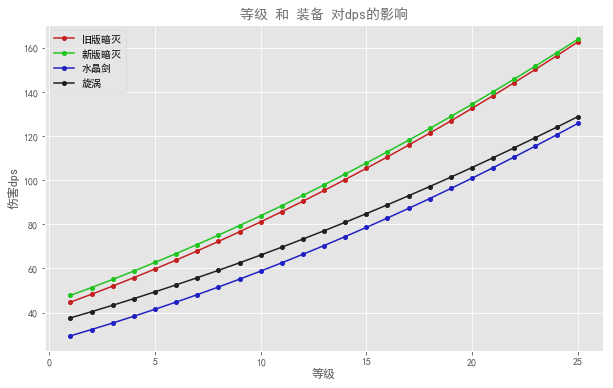

In [6]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

plt.style.use('ggplot')
fig = plt.figure(figsize = (10,6))
colors1 = '#6D6D6D'  #标题颜色

df.loc['desolator_old'].plot(
    color = '#C42022', #折线图颜色
    marker = 'o',markersize = 4, #标记形状、大小设置
    label = '旧版暗灭'
)

df.loc['desolator'].plot(
    color = '#20C420', #折线图颜色
    marker = 'o',markersize = 4, #标记形状、大小设置
    label = '新版暗灭'
)

df.loc['crystalys'].plot(
    color = '#2020C4', #折线图颜色
    marker = 'o',markersize = 4, #标记形状、大小设置
    label = '水晶剑'
)

df.loc['maelstrom'].plot(
    color = '#202020', #折线图颜色
    marker = 'o',markersize = 4, #标记形状、大小设置
    label = '旋涡'
)

# plt.legend(handles=[ln1,ln2],labels=['旧版暗灭','新版暗灭'])

plt.title('等级 和 装备 对dps的影响',color = colors1,fontsize = 14)
plt.xlabel('等级')
plt.ylabel('伤害dps')
plt.legend()
plt.show()

#### 敌方护甲 和 装备 对dps的影响

In [30]:
#敌方护甲 和 装备 对dps的影响. 定量 15级火枪手。

itemlist = [desolator_old, desolator, crystalys, maelstrom, daedalus, mjollnir, mkb, butterfly, moonShard, yasha]
itemindex = ['desolator_old', 'desolator', 'crystalys', 'maelstrom', 'daedalus', 'mjollnir', 'mkb', 'butterfly', 'moonShard', 'yasha']
eadf = pd.DataFrame(columns=[i for i in range(-5, 35)], index=itemindex)

eadf.loc[itemindex] = [[herodps(heroinfo['sniper'], 15, itemlist[row], col, 25, 1) for col in range(-5, 35)] for row in range(len(itemlist))]

eadf


1.0083036773428233 140.6 2.9259259259259265
1.0083036773428233 140.6 2.5376344086021505
1.0083036773428233 140.6 2.238095238095238
1.0083036773428233 140.6 2.0
1.0083036773428233 140.6 1.806201550387597
1.0083036773428233 140.6 1.6453900709219857
1.0083036773428233 140.6 1.5098039215686274
1.0083036773428233 140.6 1.393939393939394
1.0083036773428233 140.6 1.2937853107344632
1.0083036773428233 140.6 1.2063492063492063
1.0083036773428233 140.6 1.1293532338308458
1.0083036773428233 140.6 1.0610328638497653
1.0083036773428233 140.6 1.0
1.0083036773428233 140.6 0.9451476793248945
1.0083036773428233 140.6 0.8955823293172691
1.0083036773428233 140.6 0.8505747126436782
1.0083036773428233 140.6 0.8095238095238095
1.0083036773428233 140.6 0.7719298245614035
1.0083036773428233 140.6 0.7373737373737375
1.0083036773428233 140.6 0.7055016181229774
1.0083036773428233 140.6 0.67601246105919
1.0083036773428233 140.6 0.6486486486486487
1.0083036773428233 140.6 0.6231884057971013
1.0083036773428233 140.

,-5,-4,-3,-2,-1,0,1,2,3,4,...,25,26,27,28,29,30,31,32,33,34
desolator_old,399.997307,345.853116,304.084739,270.884235,243.860569,221.436676,202.530256,186.373861,172.408164,160.215888,...,57.452423,55.410764,53.474482,51.635623,49.887014,48.222171,46.635216,45.120807,43.674081,42.290600
desolator,371.020478,326.281378,290.719529,261.773839,237.755074,217.503958,200.198460,185.239470,172.180034,160.679933,...,59.920776,57.846778,55.877132,54.004156,52.220903,50.521077,48.898958,47.349336,45.867456,44.448973
crystalys,195.260313,180.656127,167.906441,156.679105,146.716821,137.817181,129.818770,122.591291,116.028407,110.042480,...,47.549402,46.036535,44.589803,43.204964,41.878128,40.605727,39.384478,38.211356,37.083573,35.998549
maelstrom,176.463727,165.080591,155.142933,146.391860,138.626824,131.690059,125.455751,119.822339,114.706943,110.041252,...,61.331437,60.152242,59.024597,57.945193,56.911000,55.919235,54.967341,54.052959,53.173916,52.328201
daedalus,331.497588,307.104799,285.809507,267.056936,250.417331,235.552618,222.193191,210.121421,199.159698,189.161643,...,84.781950,82.255067,79.838649,77.525607,75.309447,73.184206,71.144402,69.184984,67.301292,65.489020
mjollnir,255.309048,239.537396,225.768493,213.643638,202.884964,193.273882,184.636074,176.830826,169.743302,163.278857,...,95.790050,94.156243,92.593859,91.098315,89.665412,88.291294,86.972417,85.705516,84.487577,83.315816
mkb,259.927061,244.922589,231.823446,220.288381,210.053041,200.909471,192.691831,185.266254,178.523488,172.373493,...,108.167543,106.613209,105.126824,103.704028,102.340825,101.033549,99.778826,98.573551,97.414856,96.300093
butterfly,229.102203,212.066489,197.194039,184.097405,172.476447,162.095059,152.764950,144.334129,136.678556,129.696000,...,56.798118,55.033364,53.345759,51.730350,50.182603,48.698353,47.273771,45.905331,44.589777,43.324101
moonShard,221.255144,204.783238,190.403003,177.739810,166.503457,156.465647,147.444325,139.292527,131.890320,125.138857,...,54.653580,52.947232,51.315479,49.753534,48.257010,46.821882,45.444448,44.121297,42.849282,41.625495
yasha,149.859209,138.517077,128.615216,119.895666,112.158601,105.246824,99.034972,93.421854,88.324884,83.676000,...,35.141647,33.966700,32.843117,31.767601,30.737133,29.748941,28.800475,27.889387,27.013511,26.170842


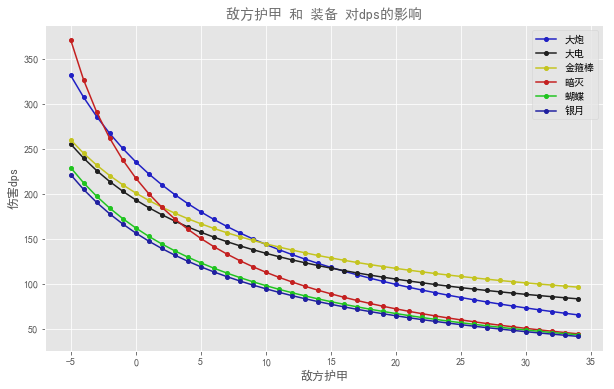

In [28]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

plt.style.use('ggplot')
fig = plt.figure(figsize = (10,6))
colors1 = '#6D6D6D'  #标题颜色

eadf.loc['daedalus'].plot(
    color = '#2020C4', #折线图颜色
    marker = 'o',markersize = 4, #标记形状、大小设置
    label = '大炮'
)

eadf.loc['mjollnir'].plot(
    color = '#202020', #折线图颜色
    marker = 'o',markersize = 4, #标记形状、大小设置
    label = '大电'
)

eadf.loc['mkb'].plot(
    color = '#C4C420', #折线图颜色
    marker = 'o',markersize = 4, #标记形状、大小设置
    label = '金箍棒'
)

eadf.loc['desolator'].plot(
    color = '#C42020', #折线图颜色
    marker = 'o',markersize = 4, #标记形状、大小设置
    label = '暗灭'
)

eadf.loc['butterfly'].plot(
    color = '#20C420', #折线图颜色
    marker = 'o',markersize = 4, #标记形状、大小设置
    label = '蝴蝶'
)

eadf.loc['moonShard'].plot(
    color = '#2020A0', #折线图颜色
    marker = 'o',markersize = 4, #标记形状、大小设置
    label = '银月'
)

plt.title('敌方护甲 和 装备 对dps的影响',color = colors1,fontsize = 14)
plt.xlabel('敌方护甲')
plt.ylabel('伤害dps')
plt.legend()
plt.show()

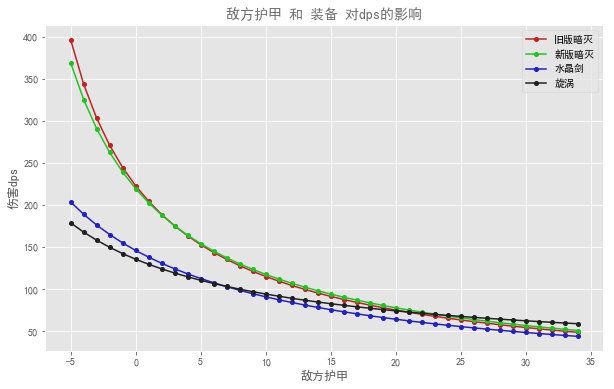

In [96]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

plt.style.use('ggplot')
fig = plt.figure(figsize = (10,6))
colors1 = '#6D6D6D'  #标题颜色

eadf.loc['desolator_old'].plot(
    color = '#C42022', #折线图颜色
    marker = 'o',markersize = 4, #标记形状、大小设置
    label = '旧版暗灭'
)

eadf.loc['desolator'].plot(
    color = '#20C420', #折线图颜色
    marker = 'o',markersize = 4, #标记形状、大小设置
    label = '新版暗灭'
)

eadf.loc['crystalys'].plot(
    color = '#2020C4', #折线图颜色
    marker = 'o',markersize = 4, #标记形状、大小设置
    label = '水晶剑'
)

eadf.loc['maelstrom'].plot(
    color = '#202020', #折线图颜色
    marker = 'o',markersize = 4, #标记形状、大小设置
    label = '旋涡'
)

plt.title('敌方护甲 和 装备 对dps的影响',color = colors1,fontsize = 14)
plt.xlabel('敌方护甲')
plt.ylabel('伤害dps')
plt.legend()
plt.show()

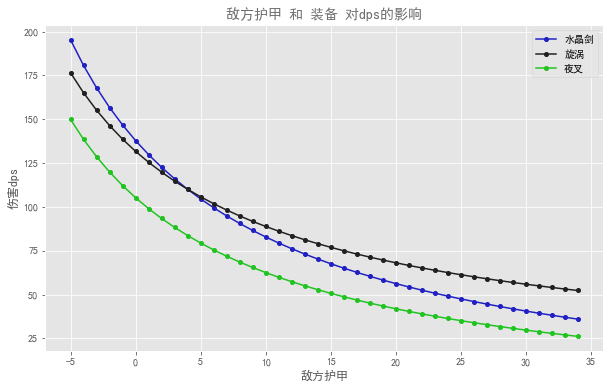

In [31]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

plt.style.use('ggplot')
fig = plt.figure(figsize = (10,6))
colors1 = '#6D6D6D'  #标题颜色

# eadf.loc['desolator_old',5:20].plot(
#     color = '#C42022', #折线图颜色
#     marker = 'o',markersize = 4, #标记形状、大小设置
#     label = '旧版暗灭'
# )

# eadf.loc['desolator',5:20].plot(
#     color = '#20C420', #折线图颜色
#     marker = 'o',markersize = 4, #标记形状、大小设置
#     label = '新版暗灭'
# )

eadf.loc['crystalys'].plot(
    color = '#2020C4', #折线图颜色
    marker = 'o',markersize = 4, #标记形状、大小设置
    label = '水晶剑'
)

eadf.loc['maelstrom'].plot(
    color = '#202020', #折线图颜色
    marker = 'o',markersize = 4, #标记形状、大小设置
    label = '旋涡'
)

eadf.loc['yasha'].plot(
    color = '#20C420', #折线图颜色
    marker = 'o',markersize = 4, #标记形状、大小设置
    label = '夜叉'
)

plt.title('敌方护甲 和 装备 对dps的影响',color = colors1,fontsize = 14)
plt.xlabel('敌方护甲')
plt.ylabel('伤害dps')
plt.legend()
plt.show()

## 多装备选择

In [15]:
#多装备计算dps 公式

# ats 每秒攻击次数 。enemyarmor ea 敌方护甲 Magic resistance mr 魔抗。attackrate 伤害倍数  ma 魔法伤害。 mad 魔法每次伤害。。

def dps(hero, level, itemlist, ea, mr, ismelee):
    ias = hero['agility'] + hero['bias'] + (level - 1) * hero['agilityadd'] + sum([item.ias for item in itemlist]) + sum([item.agility for item in itemlist])
    ats = ias * 0.01 / hero['bat']
    #如果不是敏捷英雄。攻击力算法后面应该为  item.agility --》 item.hero['mainproperty']
    damageavg = (hero['mindamage'] + hero['maxdamge'])/2 + hero[hero['mainproperty']] + (level - 1) * hero[hero['mainproperty']+'add'] + sum([item.ad for item in itemlist]) + sum([item.agility for item in itemlist])
    ea = ea - sum([item.armorReduce for item in itemlist])
    ar = 1 - ((0.052 * ea) / (0.9 + 0.048 * ea))
    print(ias, 1/ats, damageavg, ar)
    return ats * damageavg * ar * sum([item.crit for item in itemlist]) + (100-mr)/100* ats * sum([item.mad for item in itemlist]) - ismelee * 8

# 15级火枪手 攻击10点甲, 25魔抗 英雄。
dps(heroinfo['sniper'], 15, [moonShard, yasha], 10, 25, 1)

336.6 0.505050505050505 106.6 0.6231884057971013


255.07026086956517

In [114]:
# moonShard = item(ias = 140, gold = 4000)
# dragonLance = item(strength = 12, agility = 14, gold = 1700)
# yasha = item(agility = 16, ias = 12, gold = 2150)

itemlist = [moonShard, dragonLance, yasha]
sum([item.ias for item in itemlist])

152

## 疯脸的开关效率

1. 计算模型

    疯脸的效益来自 
        提高攻速->提高dps->提高吸血。
        降低护甲->增加收到伤害
    
    自变量：
        敌方dps edps，
        自身攻击力 ad，
        自身攻速 mas，
        自身护甲 ar
    中间变量：
        敌方输出（未开疯脸） enemyRealDps edps1，
        敌方输出（开启疯脸） edps2， 
        自身输出（未开疯脸） dps1，
        自身输出（开启疯脸） dps2，
        -- 吸血 lifesteal ls
        
    因变量：
        疯脸伤害差-> (dps2 + 0.2*dps2 - edps2) - (dps1 + 0.2*dps1 - edps1)
        小于0 说明疯脸带来负效益， 大于0 带来正效益

2. 展示部分
     
     分别以护甲，攻击力，攻速为x轴，敌方dps为y轴。建立三张点图。
     点图红色为正，蓝色为负，值越大，点越大。
     

In [13]:
def dpsCount(ad, mas):
    ats = mas * 0.01 / 1.7
    return ad * ats
# dpsCount(ad, mas)

def createFrame(x, y, func):
    df = pd.DataFrame(index=x, columns=y)
    for i in range(len(x)):
        for j in range(len(y)):
            df.iloc[i,j] = dpsCount(x[i], y[j])
    return df
createFrame(ad, mas, dpsCount)

,100.0,121.42857142857143,142.85714285714286,164.28571428571428,185.71428571428572,207.14285714285714,228.57142857142856,250.0,271.42857142857144,292.85714285714283,314.2857142857143,335.71428571428567,357.1428571428571,378.57142857142856,400.0
100.000000,58.8235,71.4286,84.0336,96.6387,109.244,121.849,134.454,147.059,159.664,172.269,184.874,197.479,210.084,222.689,235.294
107.142857,63.0252,76.5306,90.036,103.541,117.047,130.552,144.058,157.563,171.068,184.574,198.079,211.585,225.09,238.595,252.101
114.285714,67.2269,81.6327,96.0384,110.444,124.85,139.256,153.661,168.067,182.473,196.879,211.285,225.69,240.096,254.502,268.908
121.428571,71.4286,86.7347,102.041,117.347,132.653,147.959,163.265,178.571,193.878,209.184,224.49,239.796,255.102,270.408,285.714
128.571429,75.6303,91.8367,108.043,124.25,140.456,156.663,172.869,189.076,205.282,221.489,237.695,253.902,270.108,286.315,302.521
135.714286,79.8319,96.9388,114.046,131.152,148.259,165.366,182.473,199.58,216.687,233.794,250.9,268.007,285.114,302.221,319.328
142.857143,84.0336,102.041,120.048,138.055,156.062,174.07,192.077,210.084,228.091,246.098,264.106,282.113,300.12,318.127,336.134
150.000000,88.2353,107.143,126.05,144.958,163.866,182.773,201.681,220.588,239.496,258.403,277.311,296.218,315.126,334.034,352.941
157.142857,92.437,112.245,132.053,151.861,171.669,191.477,211.285,231.092,250.9,270.708,290.516,310.324,330.132,349.94,369.748
164.285714,96.6387,117.347,138.055,158.764,179.472,200.18,220.888,241.597,262.305,283.013,303.721,324.43,345.138,365.846,386.555


In [17]:
ad = np.linspace(100, 200, 10)
mas = np.linspace(100, 400, 10)
edps = dpsCount(ad, mas)
ar = np.linspace(3, 30, 10)

edps

array([ 58.82352941,  90.99264706, 128.67647059, 171.875     ,
       220.58823529, 274.81617647, 334.55882353, 399.81617647,
       470.58823529])

In [15]:
import pandas as pd
df = pd.DataFrame(index=ad, columns=mas)
for i in range(len(ad)):
    for j in range(len(mas)):
        df.iloc[i,j] = dpsCount(ad[i], mas[j])
df

,100.0,133.33333333333334,166.66666666666669,200.0,233.33333333333334,266.6666666666667,300.0,333.33333333333337,366.6666666666667,400.0
100.000000,58.8235,78.4314,98.0392,117.647,137.255,156.863,176.471,196.078,215.686,235.294
111.111111,65.3595,87.146,108.932,130.719,152.505,174.292,196.078,217.865,239.651,261.438
122.222222,71.8954,95.8606,119.826,143.791,167.756,191.721,215.686,239.651,263.617,287.582
133.333333,78.4314,104.575,130.719,156.863,183.007,209.15,235.294,261.438,287.582,313.725
144.444444,84.9673,113.29,141.612,169.935,198.257,226.58,254.902,283.224,311.547,339.869
155.555556,91.5033,122.004,152.505,183.007,213.508,244.009,274.51,305.011,335.512,366.013
166.666667,98.0392,130.719,163.399,196.078,228.758,261.438,294.118,326.797,359.477,392.157
177.777778,104.575,139.434,174.292,209.15,244.009,278.867,313.725,348.584,383.442,418.301
188.888889,111.111,148.148,185.185,222.222,259.259,296.296,333.333,370.37,407.407,444.444
200.000000,117.647,156.863,196.078,235.294,274.51,313.725,352.941,392.157,431.373,470.588


In [91]:
def equalize(mi, ma, num):
    if ma > mi and num > 2:
        return arange(mi, ma, (ma-mi)/num).tolist()
    else:
        return [0]*num

In [29]:
equalize(1, 10, 17)


[1.0,
 1.5294117647058822,
 2.0588235294117645,
 2.5882352941176467,
 3.117647058823529,
 3.6470588235294112,
 4.1764705882352935,
 4.705882352941176,
 5.235294117647058,
 5.76470588235294,
 6.2941176470588225,
 6.823529411764705,
 7.352941176470587,
 7.882352941176469,
 8.411764705882351,
 8.941176470588234,
 9.470588235294116]

In [31]:
rangeL = [i for i in range(1,11)]
rangeL

[1, 2, 3, 4]

In [1]:
import numpy as np
# from numpy import *;
import matplotlib
import matplotlib.pyplot as plt

N = 100 # 点的个数
rangeL = [i for i in range(1,11)]
x = rangeL*10
y = []
for i in rangeL:
    y = y + [i]*10

colors = '#c0000' # 随机产生N个0~1之间的颜色值
area = np.pi * (15 * np.random.rand(N))**2  # 点的半径范围:0~15 
# 画散点图
plt.scatter(x, y, s=area, c=colors, alpha=1, marker='s')
plt.show()


AttributeError: 'str' object has no attribute 'shape'

In [78]:
int('ff', 16)

255

In [94]:

#C00000
#ff00C0
#ff00ff
#C000ff
#0000C0
def colorEqualize(cmin, cmax, num):
    r = [cmin[:2], cmax[:2]]
    g = [cmin[2:4], cmax[2:4]]
    b = [cmin[4:], cmax[4:]]
    
    er = equalize(int(r[0], 16), int(r[1], 16), 20)
    gr = equalize(int(g[0], 16), int(g[1], 16), 20)
    br = equalize(int(b[0], 16), int(b[1], 16), 20)
    print(str(hex(int(er[0])))[2:])
    print(er, len(er))
    
    clist = []
    for i in range(len(er)):
        clist.append('#' + str(hex(int(er[i])))[2:] + '00' + str(hex(int(br[i])))[2:])
    return clist

colorEqualize('C00000', 'ff00C0', 20)
# clist = []
# for i in equalize(0.1, 0.9, 20):
#     clist.append(str(hex(int(i*256)))[2:])

# cl = []
# for j in range(len(clist)):
#     cl.append('#' + clist[j] + clist[-j-1] + '00')
# cl

c0
[192.0, 195.15, 198.3, 201.45000000000002, 204.60000000000002, 207.75000000000003, 210.90000000000003, 214.05000000000004, 217.20000000000005, 220.35000000000005, 223.50000000000006, 226.65000000000006, 229.80000000000007, 232.95000000000007, 236.10000000000008, 239.25000000000009, 242.4000000000001, 245.5500000000001, 248.7000000000001, 251.8500000000001] 20


['#c0000',
 '#c3009',
 '#c60013',
 '#c9001c',
 '#cc0026',
 '#cf0030',
 '#d20039',
 '#d60043',
 '#d9004c',
 '#dc0056',
 '#df0060',
 '#e20069',
 '#e50073',
 '#e8007c',
 '#ec0086',
 '#ef0090',
 '#f20099',
 '#f500a3',
 '#f800ac',
 '#fb00b6']

In [93]:
str(hex(int(er[i])))[2:]

NameError: name 'er' is not defined

In [51]:
a = [1, 2]
a ** 2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [13]:

rangeL = [1,2,3,4,5]
a = rangeL*5
b = []
for i in rangeL:
    b = b + [i]*5

print(len(a) , len(b))


25 25


## 关于选技生存的测算

In [28]:
import pandas as pd
data = pd.read_csv('C:\\Users\\fuwenyan\\Desktop\\关于dota的一些想法\\选技生存小怪统计.csv',engine = 'python')
# data['关卡'] = data['关卡'].fillna(method='pad')
data['计算生命值'] = data['默认生命值']/ (1 - ((0.052 * data['护甲']) / (0.9 + 0.048 * data['护甲'])))
data['总计算生命值'] = data['总计算生命值']*data['数量']
data['常规dps'] = data['数量'] * data['攻击力'] * data['攻速'] * 0.01 / 1.7
data 

,关卡,关数,怪名,数量,护甲,默认生命值,计算生命值,总计算生命值,攻击力,攻速,常规dps,技能伤害,峰值最大伤害（技能）,备注
0,第一关,1.0,小骷髅,15.0,1.0,60.0,63.482143,NaN,4.5,125.0,49.632353,NaN,NaN,NaN
1,第一关,NaN,蜥蜴人,7.0,1.0,80.0,84.642857,NaN,5.5,170.0,38.500000,NaN,NaN,NaN
2,NaN,NaN,蜥蜴人法师,2.0,0.0,80.0,80.000000,NaN,4.5,170.0,9.000000,NaN,NaN,NaN
3,第二关,2.0,豺狼人刺客,7.0,1.0,119.0,125.906250,NaN,5.5,106.0,24.005882,NaN,NaN,NaN
4,第三关,3.0,鹰身女妖观察者,5.0,1.0,107.0,113.209821,NaN,5.0,106.0,15.588235,NaN,NaN,NaN
5,NaN,3.0,鹰身女妖风暴巫师,2.0,2.0,214.0,238.950673,NaN,10.0,106.0,12.470588,120,NaN,NaN
6,第四关,4.0,贪魔,14.0,0.0,85.0,85.000000,NaN,5.5,106.0,48.011765,NaN,NaN,NaN
7,第五关,5.0,狗头人,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,失手打死了一堆 不计了
8,第六关,6.0,狗头人长官,2.0,1.0,367.0,388.299107,NaN,20.0,125.0,29.411765,NaN,NaN,NaN
9,NaN,6.0,丘陵巨魔狂战士,5.0,4.0,183.0,226.058824,NaN,8.0,106.0,24.941176,NaN,NaN,NaN


In [39]:

# 31关  攻速倍率 1.7 * 2.66 * 100 / 125 = 3.6176


3.6176000000000004

In [19]:
data.groupby(['关数'])['常规dps'].sum().sort_values()

关卡
第五关         0.000000
四十四         0.000000
四十六         0.000000
三十六         0.000000
四十五         0.000000
四十三         0.000000
四十七         0.000000
第二关        24.005882
第三关        28.058824
第四关        48.011765
第六关        54.352941
第九关        75.917647
第一关        97.132353
第七关       116.500000
第十三关      125.329412
第十关       134.088235
第八关       137.867647
第十一关      149.264706
第十四关      152.764706
第十二关      185.294118
第十五关      201.264706
第十六关      227.647059
第二十关      300.352941
第十八关      382.352941
第十七关      432.000000
第二十四关     465.964706
第十九关      552.000000
第二十二关     567.647059
第二十一关     727.941176
第二十三关     732.729412
第二十五关     899.347059
第二十六关     949.623529
第二十七关     950.000000
第三十关     1037.552941
第二十八关    1172.058824
第二十九关    1289.294118
三十四      1356.164706
第三十一关    1457.352941
三十九      1721.588235
第三十二关    1861.841176
三十三      2120.411765
三十五      2819.117647
三十七      3281.094118
三十八      3387.105882
四十一      4599.264706
四十       4753.676471
四十二      5147.752941
四十九      5

In [30]:
data.groupby(['关数'])['常规dps'].sum().sort_index()

关数
1.0       49.632353
2.0       24.005882
3.0       28.058824
4.0       48.011765
5.0        0.000000
6.0       54.352941
7.0      116.500000
8.0      137.867647
9.0       75.917647
10.0     134.088235
11.0     149.264706
12.0     185.294118
13.0     125.329412
14.0     152.764706
15.0     201.264706
16.0     227.647059
17.0     432.000000
18.0     382.352941
19.0     552.000000
20.0     300.352941
21.0     727.941176
22.0     567.647059
23.0     732.729412
24.0     465.964706
25.0     899.347059
26.0     949.623529
27.0     950.000000
28.0    1172.058824
29.0    1289.294118
30.0    1037.552941
31.0    1457.352941
32.0    1861.841176
33.0    2120.411765
34.0    1356.164706
35.0    2819.117647
36.0       0.000000
37.0    3281.094118
38.0    3387.105882
39.0    1721.588235
40.0    4753.676471
41.0    4599.264706
42.0    5147.752941
43.0    4197.200000
44.0    7219.852941
45.0    6233.088235
46.0    8326.241176
47.0    8013.600000
49.0    5800.000000
Name: 常规dps, dtype: float64

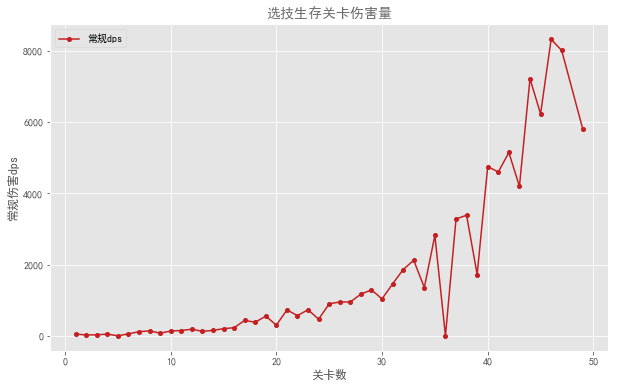

In [31]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

plt.style.use('ggplot')
fig = plt.figure(figsize = (10,6))
colors1 = '#6D6D6D'  #标题颜色

data.groupby(['关数'])['常规dps'].sum().sort_index().plot(
    color = '#C42022', #折线图颜色
    marker = 'o',markersize = 4, #标记形状、大小设置
    label = '常规dps'
)

plt.title('选技生存关卡伤害量',color = colors1,fontsize = 14)
plt.xlabel('关卡数')
plt.ylabel('常规伤害dps')
plt.legend()
plt.show()